In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:

#load data
data = r"C:\Users\Barkha\Desktop\Ansh Program\Smart-Light-Energy-Management-System\data\sensor_data.csv"
df = pd.read_csv(data)
df.head()

,ID,Name,Email,Role,Allowed_Usage_Hours,Actual_Usage_Hours
0,ccae2e7e,Tommy Mcdaniel,angela69@example.org,Client,12.0,10.42
1,5daf8d97,Johnny Marshall,dalepierce@example.com,Client,12.0,12.72
2,904b475b,Earl Kennedy,cindywood@example.com,Client,12.0,12.54
3,bb7f6157,George Hart,herreramarissa@example.net,Client,12.0,11.63
4,a60e9216,Amanda Contreras,mhogan@example.com,Client,12.0,12.29


In [19]:
df.tail()

,ID,Name,Email,Role,Allowed_Usage_Hours,Actual_Usage_Hours
995,dee277c3,Barbara Carlson,stephen59@example.org,Worker,0.5,2.27
996,abe63e1f,Susan Grimes,hkelly@example.org,Worker,0.5,2.64
997,6f2f6518,Joseph Hamilton,frazierluis@example.org,Worker,0.5,2.05
998,7f0e8807,Alexander Hernandez,carolbrown@example.net,Worker,0.5,1.26
999,42f3c808,Christopher Allen,williamsthomas@example.net,Worker,0.5,0.72


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1000 non-null   object 
 1   Name                 1000 non-null   object 
 2   Email                1000 non-null   object 
 3   Role                 1000 non-null   object 
 4   Allowed_Usage_Hours  1000 non-null   float64
 5   Actual_Usage_Hours   1000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [21]:
#check null values
df.isnull().sum()

ID                     0
Name                   0
Email                  0
Role                   0
Allowed_Usage_Hours    0
Actual_Usage_Hours     0
dtype: int64

In [22]:
# Remove duplicates if any
df = df.drop_duplicates()

# EDA


In [23]:
df.columns

Index(['ID', 'Name', 'Email', 'Role', 'Allowed_Usage_Hours',
       'Actual_Usage_Hours'],
      dtype='object')

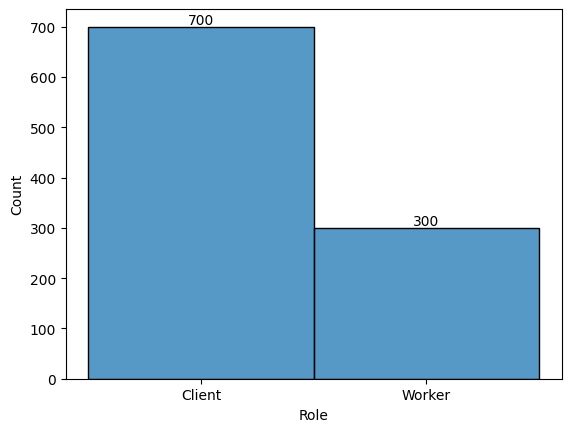

In [29]:
#Total number of clients and workers

ax = sns.histplot(data=df["Role"])
for bars in ax.containers:
    ax.bar_label(bars)


In [36]:
# Filter clients who used more energy than allowed
overused_clients = df[(df["Role"] == "Client") & (df["Actual_Usage_Hours"] > df["Allowed_Usage_Hours"])]

# Save to a new CSV
overused_clients.to_csv("data/overused_clients.csv", index=False)

# Display insights
overused_clients.head()


,ID,Name,Email,Role,Allowed_Usage_Hours,Actual_Usage_Hours
1,5daf8d97,Johnny Marshall,dalepierce@example.com,Client,12.0,12.72
2,904b475b,Earl Kennedy,cindywood@example.com,Client,12.0,12.54
4,a60e9216,Amanda Contreras,mhogan@example.com,Client,12.0,12.29
8,52a55d5e,Lisa Gibson,fmiller@example.org,Client,12.0,12.69
9,29b8ec52,Robin Sanchez,alexandria08@example.net,Client,12.0,12.26


In [38]:
overused_clients.shape

(431, 6)

- There are toal 431 clients those use extra enery

In [39]:
# Filter workers who used more than allowed cleaning time (30 min = 0.5 hours)
overused_workers = df[(df["Role"] == "Worker") & (df["Actual_Usage_Hours"] > df["Allowed_Usage_Hours"])]

# Save to a new CSV
overused_workers.to_csv("data/overused_workers.csv", index=False)

# Display insights
overused_workers.head()


,ID,Name,Email,Role,Allowed_Usage_Hours,Actual_Usage_Hours
700,8af48b7b,Denise Lane,rhonda38@example.org,Worker,0.5,1.46
701,370ddbfb,Amy Richard,xrios@example.org,Worker,0.5,1.39
702,4cde9126,Brooke Cruz,robertball@example.net,Worker,0.5,0.65
703,70adc19c,Lauren Hernandez,eburton@example.org,Worker,0.5,1.81
704,5ff0fce1,Paul Griffin,sarah13@example.net,Worker,0.5,2.49


In [40]:
overused_workers.shape

(275, 6)

- there are 275 workers who use extra energy

In [41]:
# Count of overusing clients
print(f"Total clients exceeding allowed hours: {len(overused_clients)}")

# Count of overusing workers
print(f"Total workers exceeding cleaning time: {len(overused_workers)}")


Total clients exceeding allowed hours: 431
Total workers exceeding cleaning time: 275


# MODEL

In [49]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [50]:
# Create a new column for Maintenance Cost (Assume more energy use increases cost)
df["Maintenance_Cost"] = df["Actual_Usage_Hours"] * 10  # Assume cost is proportional

# Select features and target
X = df[["Actual_Usage_Hours"]]
y = df["Maintenance_Cost"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Store model performance
results = {}

# Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {"R² Score": r2, "MAE": mae, "RMSE": rmse}
    
    print(f"📌 {name} Results:")
    print(f"✅ R² Score: {r2:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f}\n")


📌 Linear Regression Results:
✅ R² Score: 1.0000 | MAE: 0.0000 | RMSE: 0.0000

📌 Decision Tree Results:
✅ R² Score: 1.0000 | MAE: 0.0380 | RMSE: 0.0656

📌 Random Forest Results:
✅ R² Score: 1.0000 | MAE: 0.0374 | RMSE: 0.0522

📌 SVR Results:
✅ R² Score: 0.9989 | MAE: 0.8745 | RMSE: 1.6604

📌 KNN Results:
✅ R² Score: 1.0000 | MAE: 0.0598 | RMSE: 0.0809



📊 Model Comparison:


,R² Score,MAE,RMSE
Linear Regression,1.000000,1.307399e-14,1.523944e-14
Random Forest,0.999999,3.738000e-02,5.219464e-02
Decision Tree,0.999998,3.800000e-02,6.557439e-02
KNN,0.999997,5.980000e-02,8.089499e-02
SVR,0.998916,8.744909e-01,1.660363e+00


C:\Users\Barkha\AppData\Local\Temp\ipykernel_11696\911186312.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")


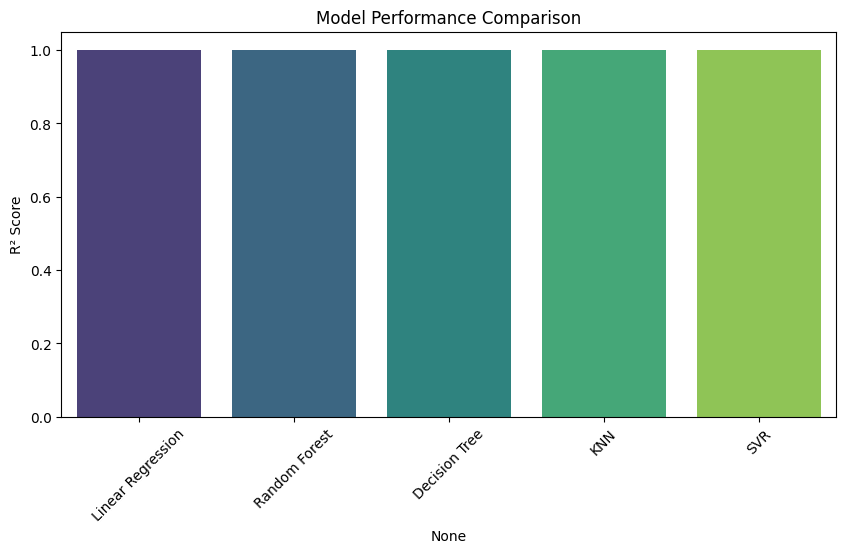

In [52]:
# Convert results into DataFrame
results_df = pd.DataFrame(results).T

# Sort by highest R² Score
results_df = results_df.sort_values(by="R² Score", ascending=False)

# Display comparison
print("📊 Model Comparison:")
display(results_df)

# Visualizing Performance
plt.figure(figsize=(10,5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [53]:
# Select best model (Highest R² Score)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

# Train on full dataset
best_model.fit(X, y)

# Save model
import joblib
joblib.dump(best_model, "best_model.pkl")

print(f"✅ Best Model: {best_model_name} saved successfully!")


✅ Best Model: Linear Regression saved successfully!


In [54]:
import pickle

with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model Type:", type(model))


Model Type: <class 'numpy.ndarray'>
